# Re-doing the Iris analysis

## Introduction

In this notebook I will re-do the Iris data analysis using a support vector machine as classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a support vector machine.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
[_Phrase your research question here. (Remember: you want to classify._)

Is it possible to predict the species with only having information about the petal?
Or might the information about sepals be more significant to predict the sepcies of iris?

## Analysis
[_write a brief introduction to your analysis below. Briefly describe your classifier_]

Aim is to figure out if information about petal or sepal are more significant to dassign a flower to its iris species.

### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris();

### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [37]:
###########################################
#------------------PETAL------------------#
###########################################

Xpetal = iris.data[:, 2:4] # [All Rows, Includes column 2: Excludes column 4] Just Petal is selected
ypetal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased

###########################################
#------------------SEPAL------------------#
###########################################

Xsepal = iris.data[:,:2] # [All Rows, From column 0: Excludes column 2] Just Sepal is selected
ysepal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [38]:
from sklearn.cross_validation import train_test_split

#A Train Set size of at least 0.8 leads to the highest accuracy of petal data(1.0)
#Even with a Train Set size of 0.5 the accuracy of petal data is still high (0.96)
#A Train Set size of 0.7 leads to the highest accuracy of sepal data(0.8)
#Everything below the train size of sepal data leads to bias (underfitting), everything above leads to variance(overfitting).


###########################################
#------------------PETAL------------------#
###########################################

Xpetal_learn, Xpetal_test, ypetal_learn, ypetal_test = train_test_split(Xpetal, ypetal, train_size=0.75, random_state = 0) #Size of trainingset = 85% of whole dataset

###########################################
#------------------SEPAL------------------#
###########################################

Xsepal_learn, Xsepal_test, ysepal_learn, ysepal_test = train_test_split(Xsepal, ysepal, train_size=0.75, random_state = 0) #Size of trainingset = 85% of whole dataset

### 4. fit the model using the train set, applying the support vector machine
[_describe how you are going to fit the model and what model parameters you are using_]

In [39]:
###########################################
#------------------PETAL------------------#
###########################################

modelp = svm.SVC()
modelp.fit(Xpetal_learn, ypetal_learn);

###########################################
#------------------SEPAL------------------#
###########################################
models = svm.SVC()
models.fit(Xsepal_learn, ysepal_learn);

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Accuracy of prediction with petal is:  0.973684210526


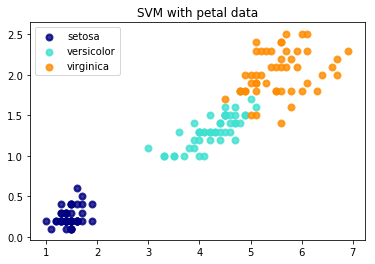

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 1 2 1 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Accuracy of prediction with sepal is:  0.763157894737


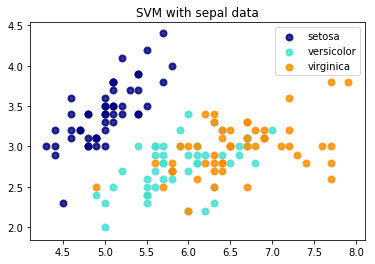

In [40]:
from sklearn.metrics import accuracy_score

###########################################
#------------------PETAL------------------#
###########################################

resultPetal = modelp.predict(Xpetal_test)
print(resultPetal)
print(ypetal_test)


print("Accuracy of prediction with petal is: ", accuracy_score(ypetal_test, resultPetal))

target_names = iris.target_names
plt.figure()
plt.title("SVM with petal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xpetal[ypetal == i, 0], Xpetal[ypetal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

###########################################
#------------------SEPAL------------------#
###########################################

resultSepal = models.predict(Xsepal_test)
print(resultSepal)
print(ysepal_test)


print("Accuracy of prediction with sepal is: ", accuracy_score(ysepal_test, resultSepal))

target_names = iris.target_names
plt.figure()
plt.title("SVM with sepal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xsepal[ysepal == i, 0], Xsepal[ysepal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

## Discussion of result
[_ reflect on the accuracy of your result and whether you have properly answered your research question _]

With 80% or more train data the petal data reaches its highest accuracy of 100% correct answers.
Even with 50% test data the petal data has an accuracy of 96%.
With 70% train data the sepal data reaches its highest accuracy of 80% correct answers.
With 1000% of correct answers as highest accuracy the petal data are significant enough to predict the species.
This leads to the assumption that the petal data are the better choice to predict the species of iris. 

This assumption can also be made from analysing the graphics. 
Here you see it is easy to separate the tree species with petal data, but versicolor and virginica have often the same sizes of sepals.